# Actividad Semanal -- 7 Regresiones y K means

## Jessica Paola Pulido Vasquez

### A01793650

**Ciencia de Datos**

*Maria de la Paz Rico Fernandez*

9 de Noviembre de 2022


In [41]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, ridge_regression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# to make this notebook's output stable across runs
np.random.seed(42)

# Ejercicio 1
## Costo en la industria de manufactura. 

Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.
Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [43]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [44]:
len(X)

1000

In [45]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

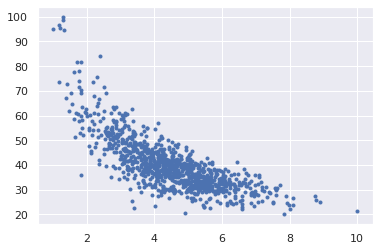

In [46]:
plt.plot(X,y,'b.')

### Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


### Regresión lineal:  

**Visualización**

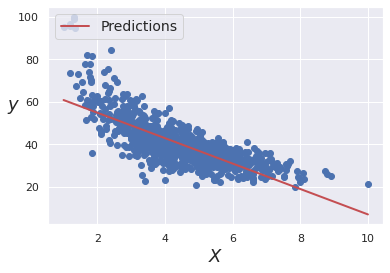

In [48]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_fit = X
y_fit = linear_reg.predict(X_fit)
plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Ecuación**

In [49]:
 print('El modelo es: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

El modelo es: Y = [-5.97912772] X + 66.79997932683362


**Errores y r cuadrada**

In [50]:
mae = []
r2 = []
mae_l= metrics.mean_absolute_error(y, y_fit)
mae.append(mae_l)
r2_l=r2_score(y, y_fit)
r2.append(r2_l)
print('Error Medio Absoluto (MAE):', mae_l)
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_fit)))
print('r2_score:', r2_l)


Error Medio Absoluto (MAE): 4.915317965170147
Error Medio Cuadrado (RMSE): 6.871857036503329
r2_score: 0.5789298498144764


### Regresión Polinomial:

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


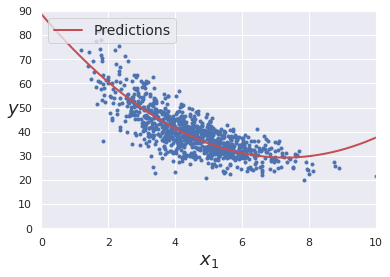

In [51]:
#polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_pol = LinearRegression(fit_intercept=True)
lin_reg_pol.fit(X_poly, y_train)
lin_reg_pol.coef_, lin_reg_pol.intercept_
X_new=np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_pol.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new.reshape(-1), y_new.reshape(-1), "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);


**Ecuación**

In [52]:
 print('El modelo es: Y =', lin_reg_pol.coef_[1],'X^2 ', lin_reg_pol.coef_[0],'X +',lin_reg_pol.intercept_)

El modelo es: Y = 1.121925894072367 X^2  -16.325067459116838 X + 88.66103372689139


**Errores y r cuadrada**

In [53]:
mae_p= metrics.mean_absolute_error(y, y_new)
mae.append(mae_p)
r2_p=r2_score(y, y_new)
r2.append(r2_p)
print('Error medio Absoluto (MAE):', mae_p)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_new)))
print('r2_score',r2_p)

Error medio Absoluto (MAE): 9.1383578624845
Root Mean Squared Error: 12.222502700934806
r2_score -0.3320683436475276


### Regresión con Ridge 


**Visualización**

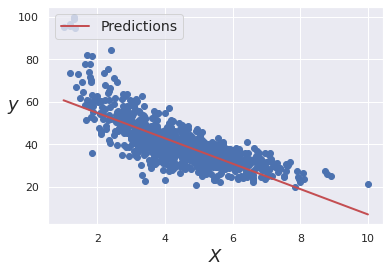

In [54]:
linear_reg_r = Ridge(fit_intercept=True, alpha=5.0)
linear_reg_r.fit(X_train, y_train)
X_fit = X
y_fit = linear_reg_r.predict(X_fit)
plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Ecuación**

In [55]:
 print('El modelo es: Y =', linear_reg_r.coef_,'X +', linear_reg_r.intercept_)

El modelo es: Y = [-5.95791307] X + 66.70507846116492


**Errores y r cuadrada**

In [56]:
mae_lr= metrics.mean_absolute_error(y, y_fit)
mae.append(mae_lr)
r2_lr=r2_score(y, y_fit)
r2.append(r2_lr)

print('Error Medio Absoluto (MAE):', mae_lr)
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_fit)))
print('r2_score:',r2_lr)

Error Medio Absoluto (MAE): 4.913001164854091
Error Medio Cuadrado (RMSE): 6.872214123575491
r2_score: 0.5788860879571204


### Regresión con Lasso

**Visualización**

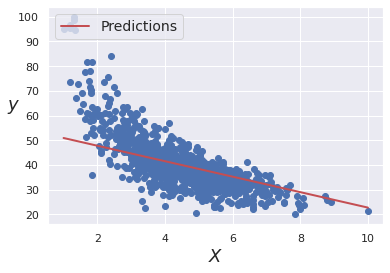

In [57]:
linear_reg_r = Lasso(fit_intercept=True, alpha=5.0)
linear_reg_r.fit(X_train, y_train)
X_fit = X
y_fit = linear_reg_r.predict(X_fit)
plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Ecuación**

In [58]:
 print('El modelo es: Y =', linear_reg_r.coef_,'X +', linear_reg_r.intercept_)

El modelo es: Y = [-3.13052647] X + 54.05714611335202


**Errores y r cuadrada**

In [59]:
mae_ll= metrics.mean_absolute_error(y, y_fit)
mae.append(mae_ll)
r2_ll=r2_score(y, y_fit)
r2.append(r2_ll)

print('Error Medio Absoluto (MAE):', mae_ll)
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_fit)))
print('r2_score:',r2_ll)

Error Medio Absoluto (MAE): 5.421396191102771
Error Medio Cuadrado (RMSE): 7.889737527333634
r2_score: 0.44495098701049873


### Gráfica MAE y R2

In [60]:
mae

[4.915317965170147, 9.1383578624845, 4.913001164854091, 5.421396191102771]

In [61]:
r2

[0.5789298498144764,
 -0.3320683436475276,
 0.5788860879571204,
 0.44495098701049873]

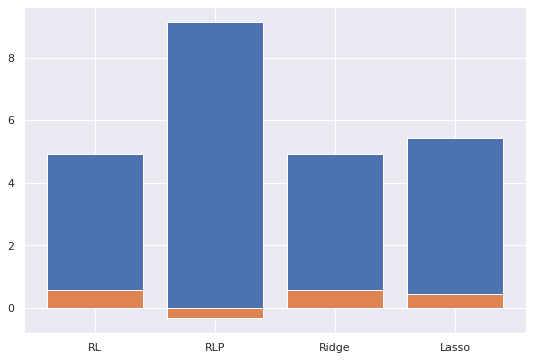

In [62]:
sns.set(rc={'figure.figsize':(9,6)})

nombres=list()
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, mae)
plt.bar(nombres, r2)
plt.show()



Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

De acuerdo al analisis de las métricas de MAE y R2 con un porcentaje del 80% de entrenamiento y 20% de evaluación, podemos concluir que el modelo de Regresión Lineal es el que más se ajusta a los datos, tiene un bajo MAE y el mejor valor de R2 en comparación a los otros modelos. 
Entre Ridge y Lasso, los valores son muy cercanos con la diferencia que Lasso castiga más a los coeficientes de las variables en comparación con Ridge.

# Ejercicio 2
## Regresión múltiple

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9806,9407150310,20150128T000000,357000.0,4,2.50,1980,9757,2.0,0,0,...,7,1980,0,1995,0,98038,47.3675,-122.019,1610,6147
19855,254000241,20150324T000000,540000.0,3,2.50,2220,5279,2.0,0,0,...,8,2220,0,2006,0,98146,47.5132,-122.387,1610,5297
5870,3416601045,20140623T000000,345000.0,3,1.00,1140,4200,2.0,0,0,...,7,1140,0,1904,0,98144,47.6012,-122.296,1510,4000
3369,9407101380,20141230T000000,189000.0,3,2.00,1460,11481,1.0,0,0,...,7,1170,290,1995,0,98045,47.4493,-121.777,1540,9680
13685,3123059107,20140520T000000,555000.0,3,2.50,3050,158558,1.0,0,0,...,9,3050,0,1987,0,98055,47.4326,-122.208,2960,31050
11551,1938000140,20150428T000000,810000.0,4,2.00,2920,10424,1.0,0,0,...,8,1520,1400,1964,0,98005,47.5876,-122.172,2360,10696
283,7202360350,20140630T000000,780000.0,4,2.50,3500,7048,2.0,0,0,...,9,3500,0,2005,0,98053,47.6811,-122.025,3920,7864
3894,2085200261,20150218T000000,422500.0,3,2.00,1960,6450,1.0,0,0,...,7,1000,960,1977,0,98038,47.3972,-122.029,1660,20720
3931,3592500985,20150504T000000,880000.0,4,2.50,2350,4675,2.0,0,0,...,9,2150,200,1923,0,98112,47.6344,-122.305,2240,3848
19722,9161100075,20150318T000000,673000.0,4,2.25,2580,2875,2.0,0,0,...,9,2580,0,2015,0,98116,47.5674,-122.392,1290,5750


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [66]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

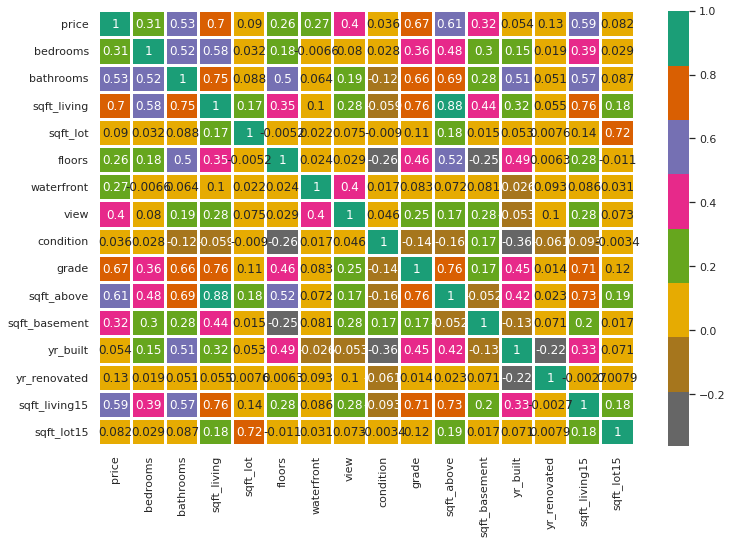

In [67]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [68]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #Este renglon nos lo fusilamos

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


### Regresión Multiple Lineal: 

**Visualización**

In [70]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_fit = X
y_fit = linear_reg.predict(X_fit)
#plt.scatter(X, y)
#plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
#plt.xlabel("$X$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.legend(loc="upper left", fontsize=14);

**Ecuación**

In [71]:
print('El modelo es: Y =',linear_reg.coef_[0][0],'X1 +',linear_reg.coef_[0][1],'X2+',
      linear_reg.coef_[0][2],'X3+\n',linear_reg.coef_[0][3],'X4+',linear_reg.coef_[0][4],'X5+',
      linear_reg.coef_[0][5],'X6+',linear_reg.coef_[0][6],'X7+\n',linear_reg.coef_[0][7],'X8+',
      linear_reg.coef_[0][8],'X9+',linear_reg.coef_[0][9],'X10+',linear_reg.coef_[0][10],'X11\n',
      linear_reg.coef_[0][11],'X12+',linear_reg.coef_[0][12],'X13+',linear_reg.coef_[0][13],'X14\n',
      linear_reg.coef_[0][14],'X15+',linear_reg.intercept_)

El modelo es: Y = -38200.80483396449 X1 + 41466.13802863147 X2+ 107.99258400093822 X3+
 0.0171356997161638 X4+ 31691.691313553605 X5+ 552691.0233181857 X6+ 41249.32275203692 X7+
 21222.144256109055 X8+ 119493.21585367358 X9+ 47.77502707057647 X10+ 60.21755653483342 X11
 -3550.9021573131968 X12+ 13.260221498272529 X13+ 29.00592838751345 X14
 -0.5481326027838804 X15+ [6151359.2627409]


**Errores y r cuadrada**

In [72]:
mae = []
r2 = []
mae_l= metrics.mean_absolute_error(y, y_fit)
mae.append(mae_l)
r2_l=r2_score(y, y_fit)
r2.append(r2_l)
print('Error Medio Absoluto (MAE):', mae_l)
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_fit)))
print('r2_score:', r2_l)

Error Medio Absoluto (MAE): 139090.35238662068
Error Medio Cuadrado (RMSE): 216092.052373392
r2_score: 0.6535308525095571


# Regresión Multiple Polinomial:

**Visualización**

In [73]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_pol = LinearRegression(fit_intercept=True)
lin_reg_pol.fit(X_poly, y_train)
lin_reg_pol.coef_, lin_reg_pol.intercept_
#X_new=np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X)
y_new = lin_reg_pol.predict(X_new_poly)
#plt.plot(X, y, "b.")
#plt.plot(X_new.reshape(-1), y_new.reshape(-1), "r-", linewidth=2, label="Predictions")
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 10, 0, 90]);

**Ecuación**

In [74]:
print('El modelo es: Y =',lin_reg_pol.coef_[0][14],'X1^2 +',lin_reg_pol.coef_[0][1],'X2+',
      lin_reg_pol.coef_[0][2],'X3+\n',lin_reg_pol.coef_[0][3],'X4+',lin_reg_pol.coef_[0][4],'X5+',
      lin_reg_pol.coef_[0][5],'X6+',lin_reg_pol.coef_[0][6],'X7+\n',lin_reg_pol.coef_[0][7],'X8+',
      lin_reg_pol.coef_[0][8],'X9+',lin_reg_pol.coef_[0][9],'X10+',lin_reg_pol.coef_[0][10],'X11\n',
      lin_reg_pol.coef_[0][11],'X12+',lin_reg_pol.coef_[0][12],'X13+',lin_reg_pol.coef_[0][13],'X14\n',
      lin_reg_pol.coef_[0][0],'X15+',lin_reg_pol.intercept_)

El modelo es: Y = -34.01063159901658 X1^2 + -1093307.2988890775 X2+ -456.44993232234583 X3+
 -27.868628841106222 X4+ -2074072.3849893238 X5+ -3954318.699668158 X6+ -288638.0258699706 X7+
 558697.5702310547 X8+ 1098645.1037843083 X9+ -219.75841511336466 X10+ -382.0342717188405 X11
 -85963.09077123865 X12+ -2953.515948116647 X13+ 3999.657097775203 X14
 933912.8339811402 X15+ [80227028.3104757]


**Errores y r cuadrada**

In [75]:
mae_p= metrics.mean_absolute_error(y, y_new)
mae.append(mae_p)
r2_p=r2_score(y, y_new)
r2.append(r2_p)
print('Error medio Absoluto (MAE):', mae_p)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_new)))
print('r2_score',r2_p)

Error medio Absoluto (MAE): 123003.07391385935
Root Mean Squared Error: 183262.844181563
r2_score 0.7508070085482581


### Regresión con Ridge 

**Visualización**

In [76]:
linear_reg_r = Ridge(fit_intercept=True, alpha=5.0)
linear_reg_r.fit(X_train, y_train)
X_fit = X
y_fit = linear_reg_r.predict(X_fit)
#plt.scatter(X, y)
#plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
#plt.xlabel("$X$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.legend(loc="upper left", fontsize=14);

**Ecuación**

In [77]:
print('El modelo es: Y =',linear_reg_r.coef_[0][0],'X1 +',linear_reg_r.coef_[0][1],'X2+',
      linear_reg_r.coef_[0][2],'X3+\n',linear_reg_r.coef_[0][3],'X4+',linear_reg_r.coef_[0][4],'X5+',
      linear_reg_r.coef_[0][5],'X6+',linear_reg_r.coef_[0][6],'X7+\n',linear_reg_r.coef_[0][7],'X8+',
      linear_reg_r.coef_[0][8],'X9+',linear_reg_r.coef_[0][9],'X10+',linear_reg_r.coef_[0][10],'X11\n',
      linear_reg_r.coef_[0][11],'X12+',linear_reg_r.coef_[0][12],'X13+',linear_reg_r.coef_[0][13],'X14\n',
      linear_reg_r.coef_[0][14],'X15+',linear_reg_r.intercept_)

El modelo es: Y = -38289.61705081894 X1 + 41391.43057376797 X2+ 108.0960896044976 X3+
 0.016148636349877774 X4+ 31678.80565481804 X5+ 531220.1886360015 X6+ 42249.23999761328 X7+
 21242.41983185391 X8+ 119381.75725604131 X9+ 47.93028118424304 X10+ 60.16580372982774 X11
 -3548.9395189878137 X12+ 13.536598656625149 X13+ 28.9064351916406 X14
 -0.5474879074647545 X15+ [6148385.38096804]


**Errores y r cuadrada**

In [78]:
mae_lr= metrics.mean_absolute_error(y, y_fit)
mae.append(mae_lr)
r2_lr=r2_score(y, y_fit)
r2.append(r2_lr)

print('Error Medio Absoluto (MAE):', mae_lr)
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_fit)))
print('r2_score:',r2_lr)

Error Medio Absoluto (MAE): 139095.68762456687
Error Medio Cuadrado (RMSE): 216115.18092831492
r2_score: 0.6534566826411484


### Regresión con Lasso

**Visualización**

In [79]:
linear_reg_r = Lasso(fit_intercept=True, alpha=5.0)
linear_reg_r.fit(X_train, y_train)
X_fit = X
y_fit = linear_reg_r.predict(X_fit)
#plt.scatter(X, y)
#plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
#plt.xlabel("$X$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.legend(loc="upper left", fontsize=14);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


**Ecuación**

In [80]:
print('El modelo es: Y =',linear_reg_r.coef_[0],'X1 +',linear_reg_r.coef_[1],'X2+',
      linear_reg_r.coef_[2],'X3+\n',linear_reg_r.coef_[3],'X4+',linear_reg_r.coef_[4],'X5+',
      linear_reg_r.coef_[5],'X6+',linear_reg_r.coef_[6],'X7+\n',linear_reg_r.coef_[7],'X8+',
      linear_reg_r.coef_[8],'X9+',linear_reg_r.coef_[9],'X10+',linear_reg_r.coef_[10],'X11\n',
      linear_reg_r.coef_[11],'X12+',linear_reg_r.coef_[12],'X13+',linear_reg_r.coef_[13],'X14\n',
      linear_reg_r.coef_[14],'X15+',linear_reg_r.intercept_)

El modelo es: Y = -38194.45323514413 X1 + 41444.73179048333 X2+ 293.47344248970586 X3+
 0.017098112104736083 X4+ 31668.940317932655 X5+ 551941.4456966016 X6+ 41277.53601100818 X7+
 21208.37395949508 X8+ 119486.32302411212 X9+ -137.68247706078557 X10+ -125.25384089606658 X11
 -3550.6416260663295 X12+ 13.273343865783689 X13+ 29.002935373322494 X14
 -0.5481499620024363 X15+ [6150963.51853761]


**Errores y r cuadrada**

In [81]:
mae_ll= metrics.mean_absolute_error(y, y_fit)
mae.append(mae_ll)
r2_ll=r2_score(y, y_fit)
r2.append(r2_ll)

print('Error Medio Absoluto (MAE):', mae_ll)
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_fit)))
print('r2_score:',r2_ll)

Error Medio Absoluto (MAE): 139090.64077751062
Error Medio Cuadrado (RMSE): 216092.68444652998
r2_score: 0.6535288256496228


### Gráfica MAE y R2

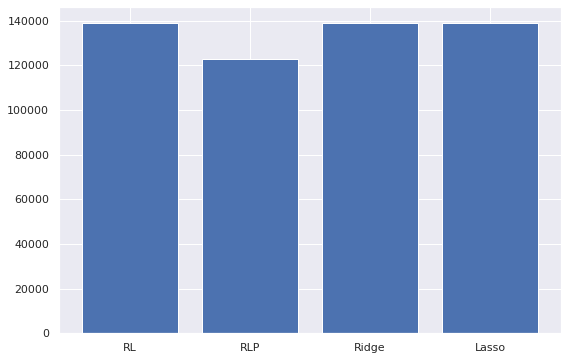

In [82]:
sns.set(rc={'figure.figsize':(9,6)})

nombres=list()
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, mae)
plt.show()

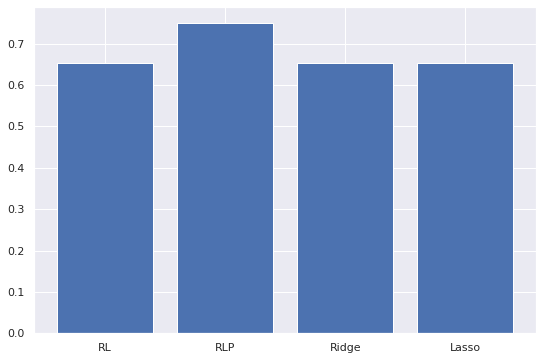

In [84]:
sns.set(rc={'figure.figsize':(9,6)})

nombres=list()
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, r2)
plt.show()

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

De acuerdo al analisis de las métricas de MAE y R2 con un porcentaje del 90% de entrenamiento y 10% de evaluación, podemos concluir que el modelo de Regresión Lineal Polinomial es el que más se ajusta a los datos, tiene un bajo MAE y el mejor valor de R2 en comparación a los otros modelos. 
Entre Ridge y Lasso, los valores son muy cercanos con la diferencia que Lasso castiga más a los coeficientes de las variables en comparación con Ridge.